# Case Study

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import decomposition

In [2]:
#Help funcs for colored output
from termcolor import colored, cprint
def green(txt):
    return colored(txt, 'green')
def red(txt):
    return colored(txt, 'red')
def blue(txt):
    return colored(txt, 'cyan')
def bold(txt):
    return colored(txt, attrs=['bold'])

In [3]:
#Get raw Data
df = pd.read_csv("data/house_data_training.csv", sep=';') 
#Deleting row index and id
df = df.iloc[:, 2:]

## Visualisierung 1.0

In [4]:
#Wieder rausnehmen! Nur zur überprüfung.
df = df.loc[df.price != 99999999.0].loc[df.price != 9999999.9]

df.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  1.456800e+04  14568.000000  14568.000000  14568.000000  1.456800e+04   
mean   5.293418e+05      3.369920      2.111237   2088.914333  1.489882e+04   
std    3.689647e+05      0.902979      0.767392    982.801041  3.874728e+04   
min    1.000000e+04      0.000000      0.000000    370.000000  5.200000e+02   
25%    3.149500e+05      3.000000      1.500000   1430.000000  5.045250e+03   
50%    4.450000e+05      3.000000      2.250000   1910.000000  7.650000e+03   
75%    6.381750e+05      4.000000      2.500000   2550.000000  1.080000e+04   
max    7.700000e+06     11.000000      8.000000  17180.000000  1.164794e+06   

             floors    waterfront     dis_super          view     condition  \
count  14568.000000  14565.000000  14565.000000  14565.000000  14565.000000   
mean       1.491557      0.006934    937.177795      0.230278      3.406660   
std        0.538263      0.082987    268.872824      0.760248      0.648258   
min        1.000000      0.000000     93.000000      0.000000      1.000000   
25%        1.000000      0.000000    757.380000      0.000000      3.000000   
50%        1.500000      0.000000    936.290000      0.000000      3.000000   
75%        2.000000      0.000000   1115.560000      0.000000      4.000000   
max        3.500000      1.000000   1919.340000      4.000000      5.000000   

       ...      yr_built  yr_renovated       zipcode           lat  \
count  ...  14565.000000  14568.000000  14568.000000  14568.000000   
mean   ...   1971.323447     79.732839  98076.407812     47.554319   
std    ...     29.252334    390.886818     53.806339      0.141311   
min    ...   1900.000000      0.000000  98001.000000     47.155900   
25%    ...   1952.000000      0.000000  98031.000000     47.457075   
50%    ...   1975.000000      0.000000  98065.000000     47.567300   
75%    ...   1997.000000      0.000000  98117.000000     47.675700   
max    ...   2015.000000   2015.000000  98199.000000     47.777600   

               long  sqft_living15     sqft_lot15          ahf1          ahf2  \
count  14568.000000   14568.000000   14568.000000  14568.000000  14568.000000   
mean    -122.214723    1985.841914   12700.893053     48.585591    104.135094   
std        0.139002     688.624767   26949.033356     22.161667     12.983094   
min     -122.515000     399.000000     651.000000     10.010585     55.397985   
25%     -122.326000    1480.000000    5100.000000     29.264160     95.303830   
50%     -122.235000    1830.000000    7650.000000     48.527803    104.254442   
75%     -122.127000    2370.000000   10114.250000     67.776790    112.942215   
max     -121.321000    6210.000000  871200.000000     86.999842    157.639420   

               ahf3  
count  14568.000000  
mean     152.720685  
std       25.699571  
min       75.072384  
25%      132.942195  
50%      152.804935  
75%      172.347921  
max      229.276426  

[8 rows x 23 columns]

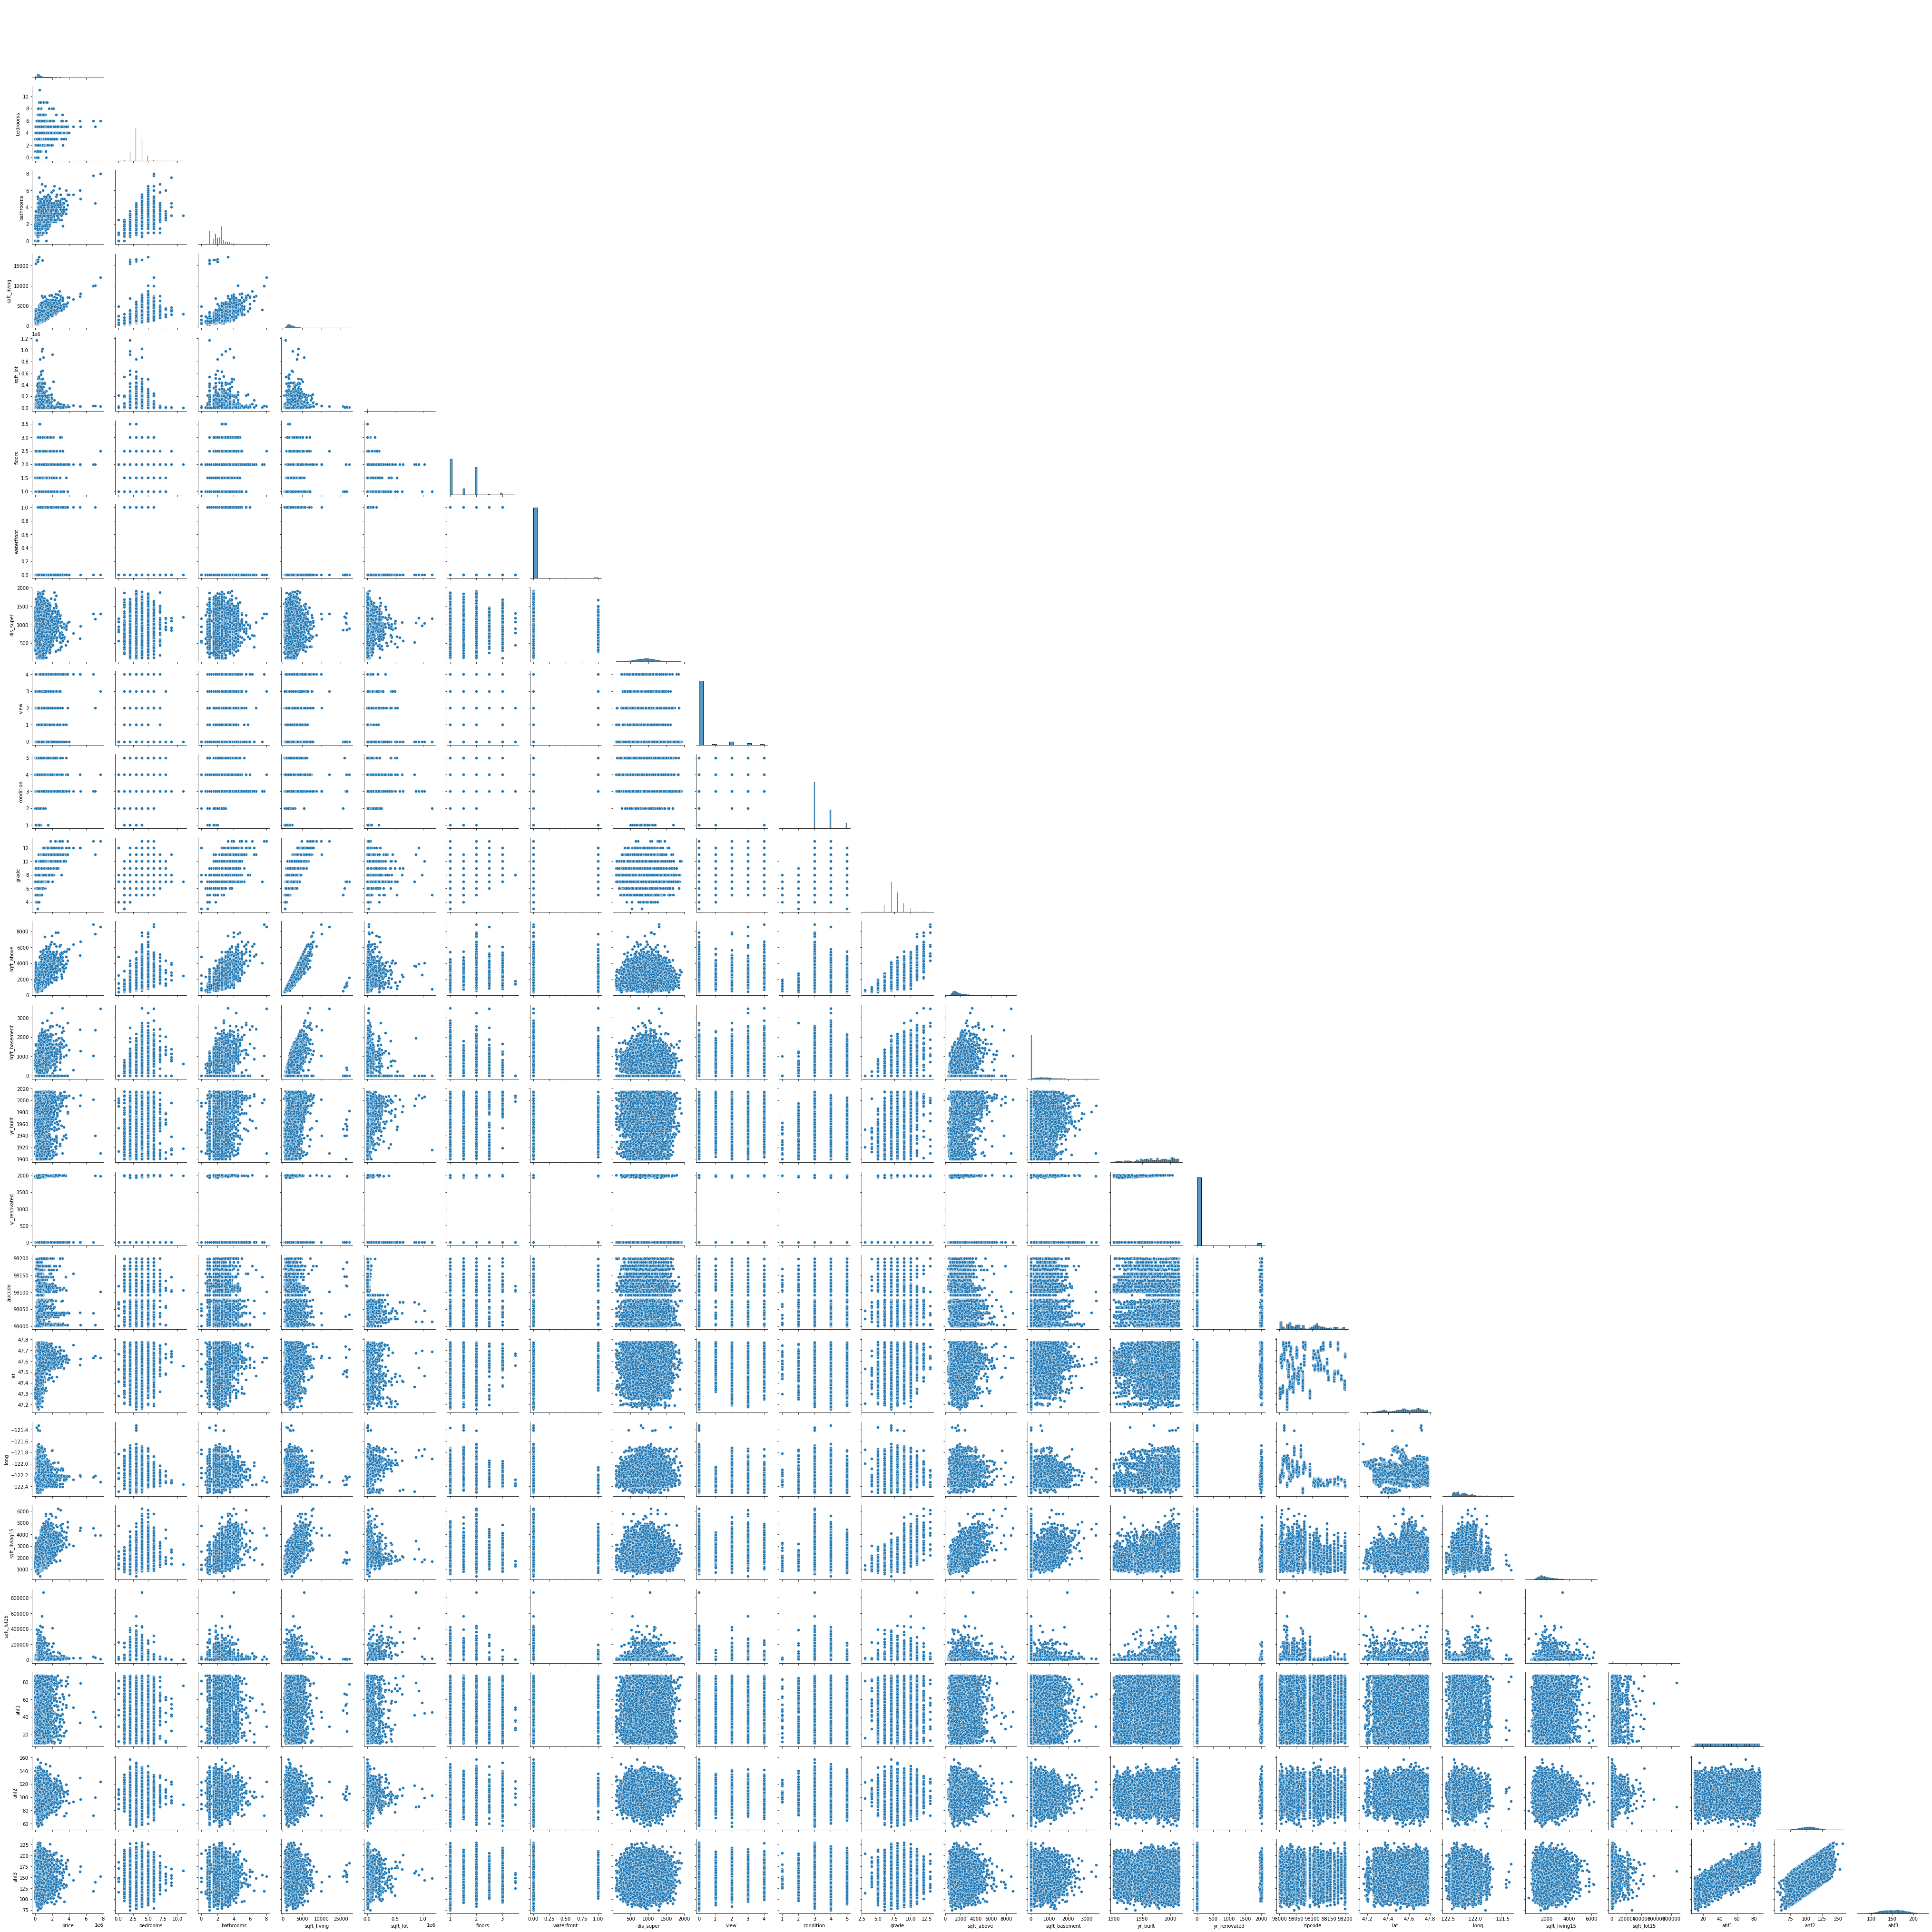

In [5]:
sns.pairplot(df, 
    #x_vars=['price', 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront', 'dis_super', 'view', 'condition','grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated','sqft_living15', 'sqft_lot15'],
    #y_vars=['price', 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront', 'dis_super', 'view', 'condition','grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated','sqft_living15', 'sqft_lot15'],
    corner=True)

### Geographische Lage

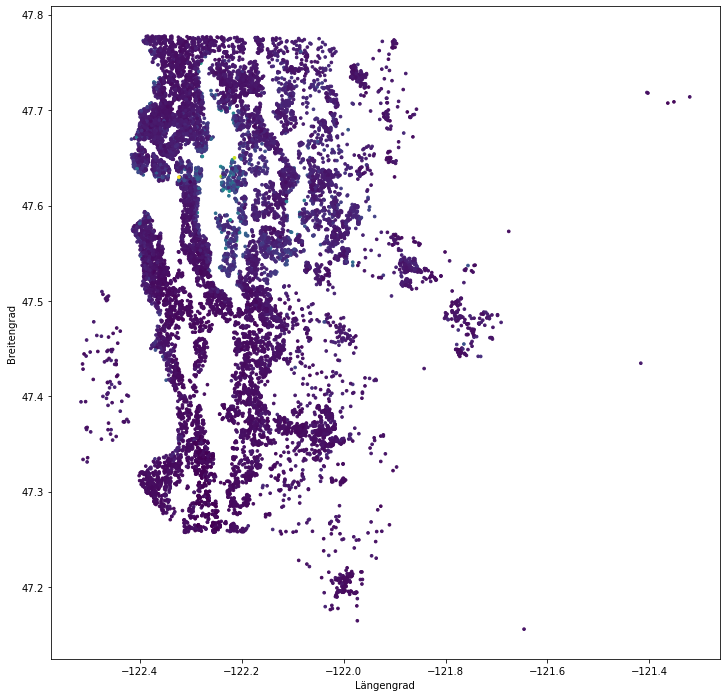

In [6]:
# Color verbessern, aber sehr gute visualisierung
plt.figure(figsize=(12,12))
plt.scatter(df["long"], df["lat"], c=df["price"], s=7)
plt.xlabel("Längengrad")
plt.ylabel("Breitengrad")
plt.show()

### Label & Features

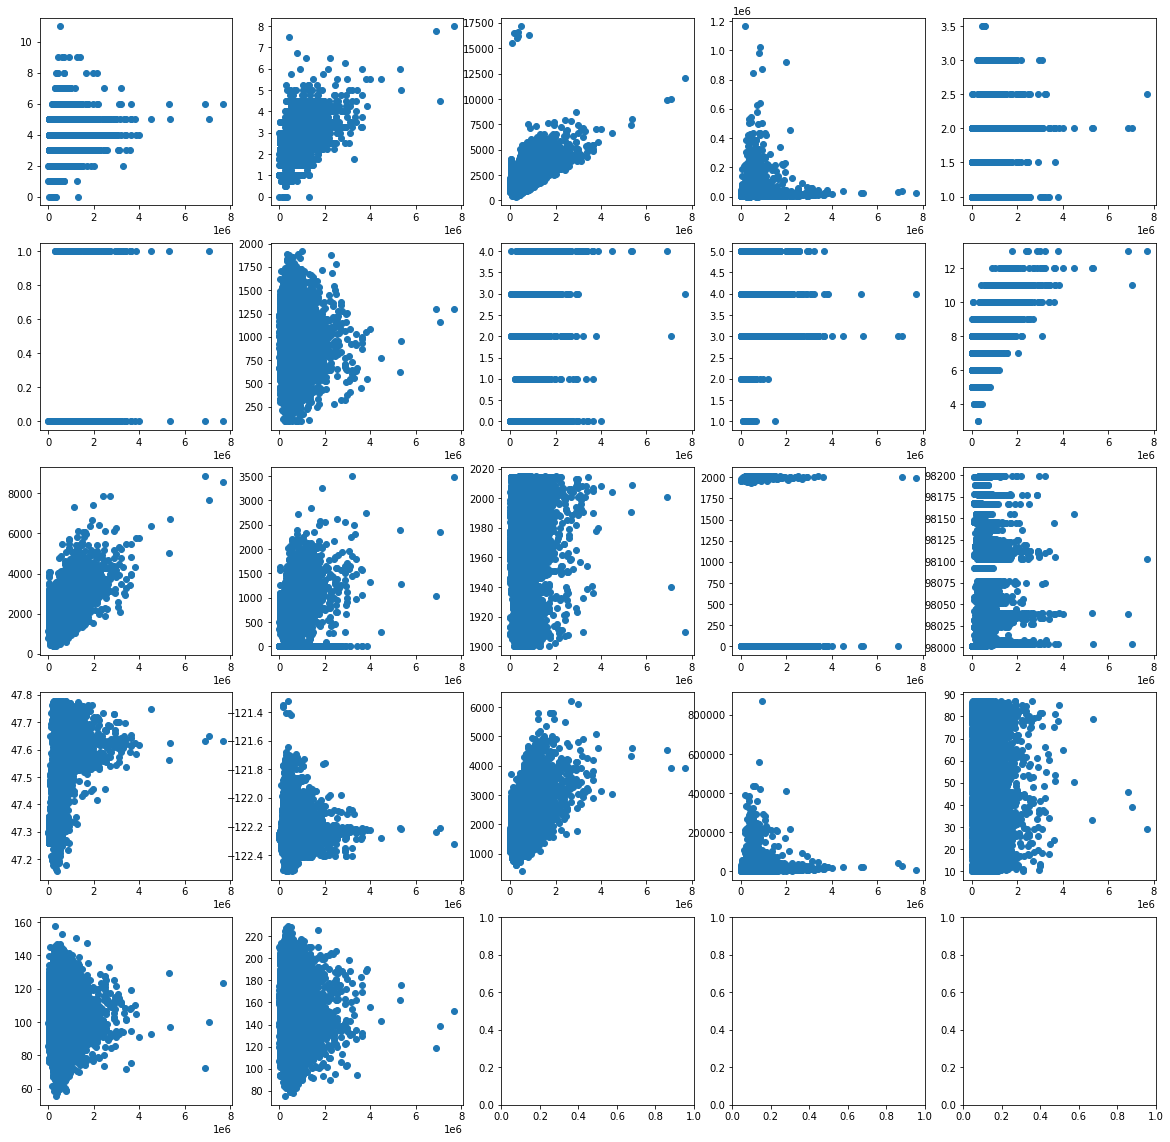

In [7]:
#Anzeige verbessern + Legenden
fig, axs=plt.subplots(5,5, figsize=(20,20))
for i,ax in zip(df.iloc[:,2:],axs.ravel()):
    ax.scatter(df["price"],df[i])

### Quadratmeter

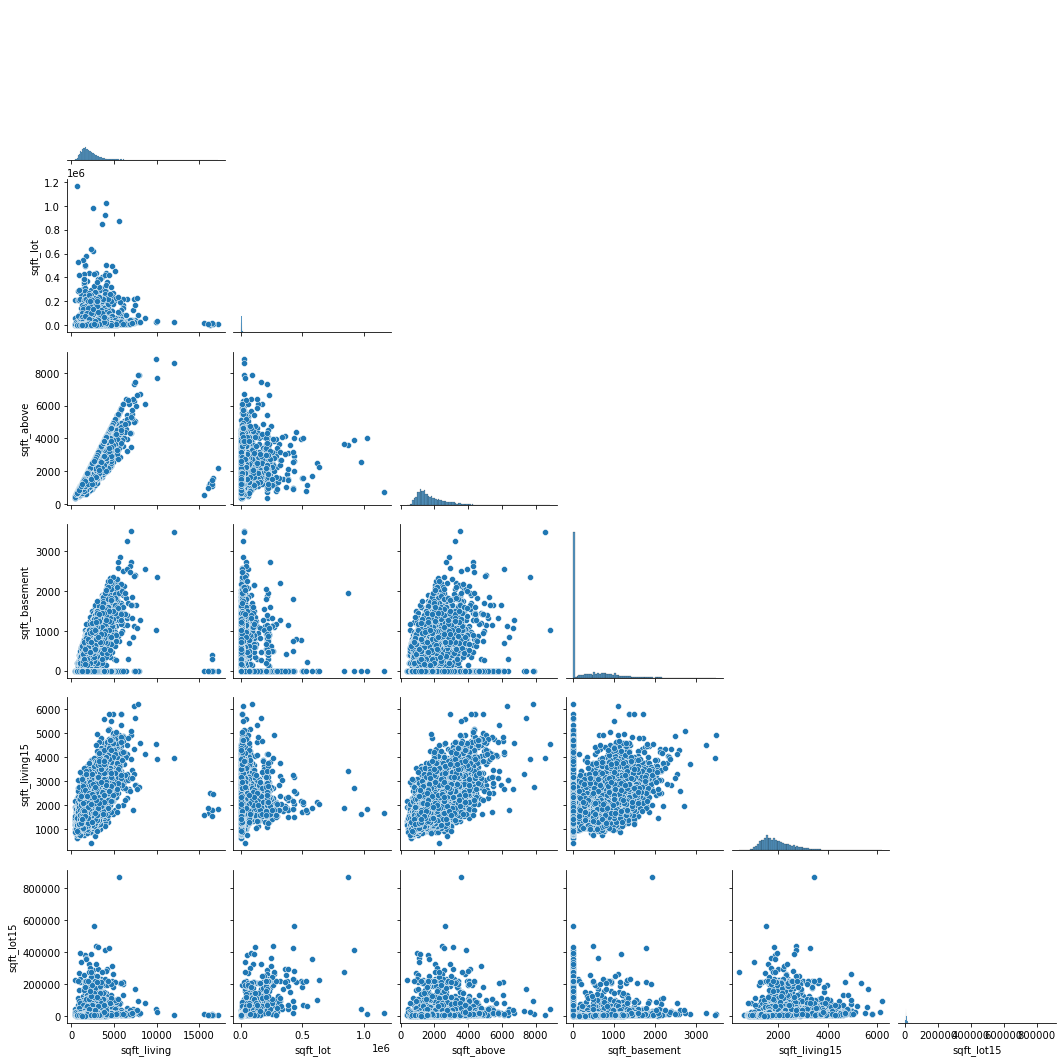

In [8]:
#Keine relevanten Erkenntnisse!? Rausnehmen?
all_sqft_features=['sqft_living','sqft_lot','sqft_above', 'sqft_basement','sqft_living15','sqft_lot15']
sns.pairplot(df, x_vars=all_sqft_features, y_vars=all_sqft_features, corner=True)

## Ausreißer

### Manuelle Betrachtung

Der Preis ist sehr auffällig:


<AxesSubplot:>

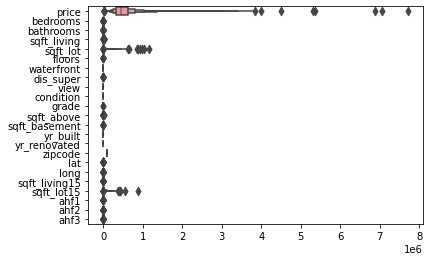

In [9]:
#Visuallisierung von Ausreißern
print("Der Preis ist sehr auffällig:")
sns.boxenplot(data=df,orient="h")

In [10]:
print("Die kleinsten zehn Werte des Features price:")
print(np.sort(df.price.unique())[:10],"\n")

print("Die größten zehn Werte des Features price:")
print(np.sort(df.price.unique())[-10:],"\n")

print("Anzahl Ausreißer mit 99 Millionen: " + str(len(df.loc[df.price == 99999999.0])))
print("Anzahl Ausreißer mit 9 Millionen: " + str(len(df.loc[df.price == 9999999.9])))

df = df.loc[df.price != 99999999.0].loc[df.price != 9999999.9]

Die kleinsten zehn Werte des Features price:
[10000. 11500. 12450. 13250. 13900. 13995. 15000. 15400. 15900. 16000.] 

Die größten zehn Werte des Features price:
[3650000. 3800000. 3850000. 4000000. 4500000. 5300000. 5350000. 6885000.
 7062500. 7700000.] 

Anzahl Ausreißer mit 99 Millionen: 0
Anzahl Ausreißer mit 9 Millionen: 0


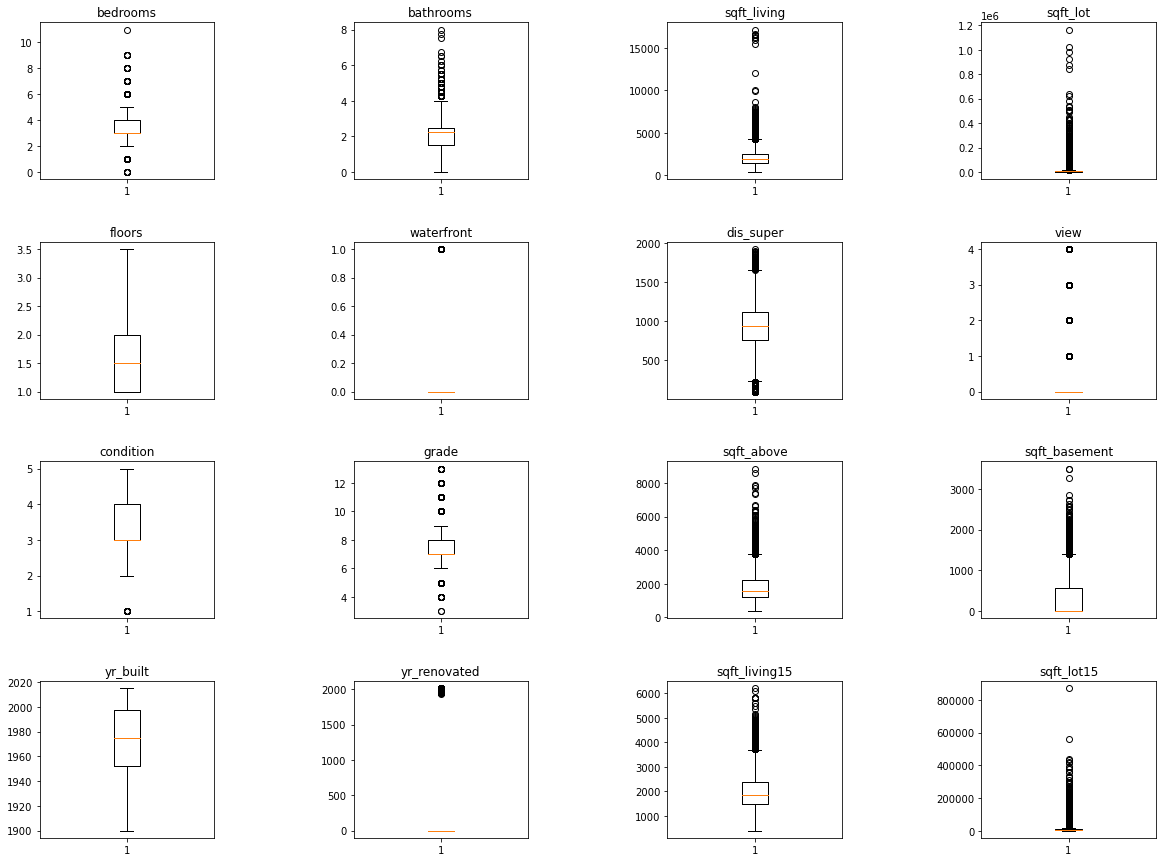

In [11]:
#Visuallisierung von Ausreißern
re_col=['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'dis_super', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15']
       

fig, ax = plt.subplots(4,4, figsize=(20,15))
fig.subplots_adjust(hspace = .4, wspace=0.8)
ax=ax.ravel()

x=0
for i in re_col:
    ax[x].boxplot(df.dropna()[i])
    ax[x].set_title(i)
    x+=1

In [12]:
for i in df.columns:
    all = len(df)
    modus = len(df.loc[df[i] == df[i].mode()[0]])
    percentage = round(modus / all, 4) * 100
    if percentage > 5 and df[i].mode()[0] == 0:
        print(f"{i}:  \n    Der Wert 0 macht {percentage}% aller Werte aus")

waterfront:  
    Der Wert 0 macht 99.29% aller Werte aus
view:  
    Der Wert 0 macht 90.32% aller Werte aus
sqft_basement:  
    Der Wert 0 macht 61.24000000000001% aller Werte aus
yr_renovated:  
    Der Wert 0 macht 96.0% aller Werte aus


Die vier Featurs **waterfront**, **view**, **sqft_basement** und **yr_renovated** enthalten auffällig oft den Wert 0.
  
- Bei **view** könnte der Wert teil der Skala sein.  
- Im Fall von **sqft_basement** würde 0 vermutlich keinen Keller bedeuten.  
- Für **yr_renovated** stellt die 0 einen unrealistischen Wert dar. Sie könnte dennoch eine Information enthalten.  
- **waterfront** hat nur die Werte 0 und 1. Diese Werte wohl für Wahrheitswerte, sprich ob ein Haus eine Wasserfront hat oder nicht. Das würde die 99.31% 0 erklären.  
  
Auch bei **sqft_lot** und **sqft_lot 15** gibt es unnatürlich viele Werte bei 0. Das scheint aber an Ausreißern (siehe weiter unter) und der kleinen Darstellung zu liegen.
  
*Anmerkung: der folgende Teil wurde erst nach der Entfernung der Ausreißer beim Preis ausgeführt*  

##### **view:**
Obwohl die Wertung 0 im Feature **view** unüblich oft auftaucht, scheint sie nicht weiter ungewöhnlich zu sein.  
Der durchschnittliche Preis steigt einigermaßen gleichmäßig von 0 bis 5 an, wie der Barplot weiter unten aufzeigt

<AxesSubplot:xlabel='view', ylabel='price'>

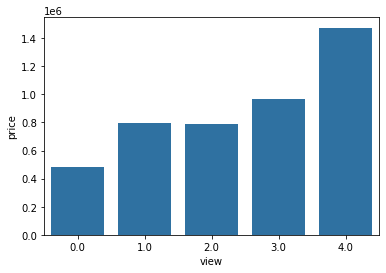

In [13]:
view_df = df.loc[:, ["view", "price"]].groupby("view").mean()
sns.barplot(x=view_df.index, y=view_df.price, color="#1c74b4")

##### **waterfront:**
Die Gebäude mit **waterfront** = 1 sind deutlich mehr Wert. Die 0 steht anscheinend wirklich für keine Wasserfront.

In [14]:
print("Werte in df.waterfront:",df.waterfront.unique())

waterfront_0 = round(df.loc[df.waterfront == 0].price.mean(), 2)
waterfont_1 = round(df.loc[df.waterfront != 0].price.mean(), 2)
difference = round((waterfont_1 / waterfront_0 - 1) * 100, 2) 

print(f"Der durchschnittliche Preis bei waterfront = 0: {waterfront_0}\nDer durchschnittliche Preis bei waterfront = 1: {waterfont_1}\nDas sind etwa {difference}% mehr.")

Werte in df.waterfront: [ 0.  1. nan]
Der durchschnittliche Preis bei waterfront = 0: 521284.7
Der durchschnittliche Preis bei waterfront = 1: 1649895.12
Das sind etwa 216.51% mehr.


##### **sqft_basement:**

Der Wert 0 bei **sqft_basement** senkt den Durchschnittspreis etwas im Vergleich zu anderen Werten.  
Insgesamt scheint er aber nicht aus dem Rahmen zu fallen.

<AxesSubplot:>

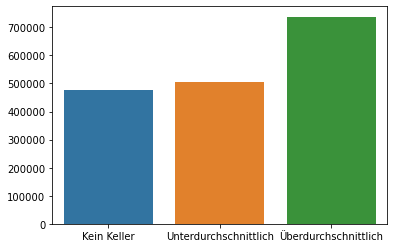

In [15]:
sqft_basement_0 = round(df.loc[df.sqft_basement == 0].price.mean(), 2)
mean = df.loc[df.sqft_basement != 0].sqft_basement.mean()
sqft_basement_below_mean = round(df.loc[np.logical_and(df.sqft_basement != 0, df.sqft_basement < mean)].price.mean(), 2)
sqft_basement_above_mean = round(df.loc[np.logical_and(df.sqft_basement != 0, df.sqft_basement > mean)].price.mean(), 2)

sns.barplot(x=["Kein Keller","Unterdurchschnittlich", "Überdurchschnittlich"], y=[sqft_basement_0,sqft_basement_below_mean,sqft_basement_above_mean])

##### **yr_renovated:**
Wie durch den Codeblock dargestellt, ist der durchschnittliche Preis von Gebäuden mit Renovierungsdatum deutlich höher.  
Eine mögliche Erklärung wäre, dass die 0 bei **yr_renovated** bedeutet, dass das Gebäude noch nicht renoviert wurde.  
Sicher ist dabei, dass der Wert 0 eine Auswirkung auf den Preis hat. Daher muss diese Information erhalten bleiben.

In [16]:
no_renovated_mean = round(df.loc[df.yr_renovated == 0].price.mean(), 2)
renovated_mean = round(df.loc[df.yr_renovated != 0].price.mean(), 2)
difference = round((renovated_mean / no_renovated_mean - 1) * 100, 2) 

print(f"Der durchschnittliche Preis von Gebäuden ohne Renovierungsdatum ist: {no_renovated_mean}\nDer durchschnittliche Preis von Gebäuden mit Renovierungsdatum ist: {renovated_mean}\nDas sind etwa {difference}% mehr.")

Der durchschnittliche Preis von Gebäuden ohne Renovierungsdatum ist: 520098.8
Der durchschnittliche Preis von Gebäuden mit Renovierungsdatum ist: 751459.07
Das sind etwa 44.48% mehr.


### Z-Score

Erst mit einem ungewöhlichen hohen Z-Score Limit von 10 scheint die Ausreißererkennung brauchbare Werte zu erzeugen. 

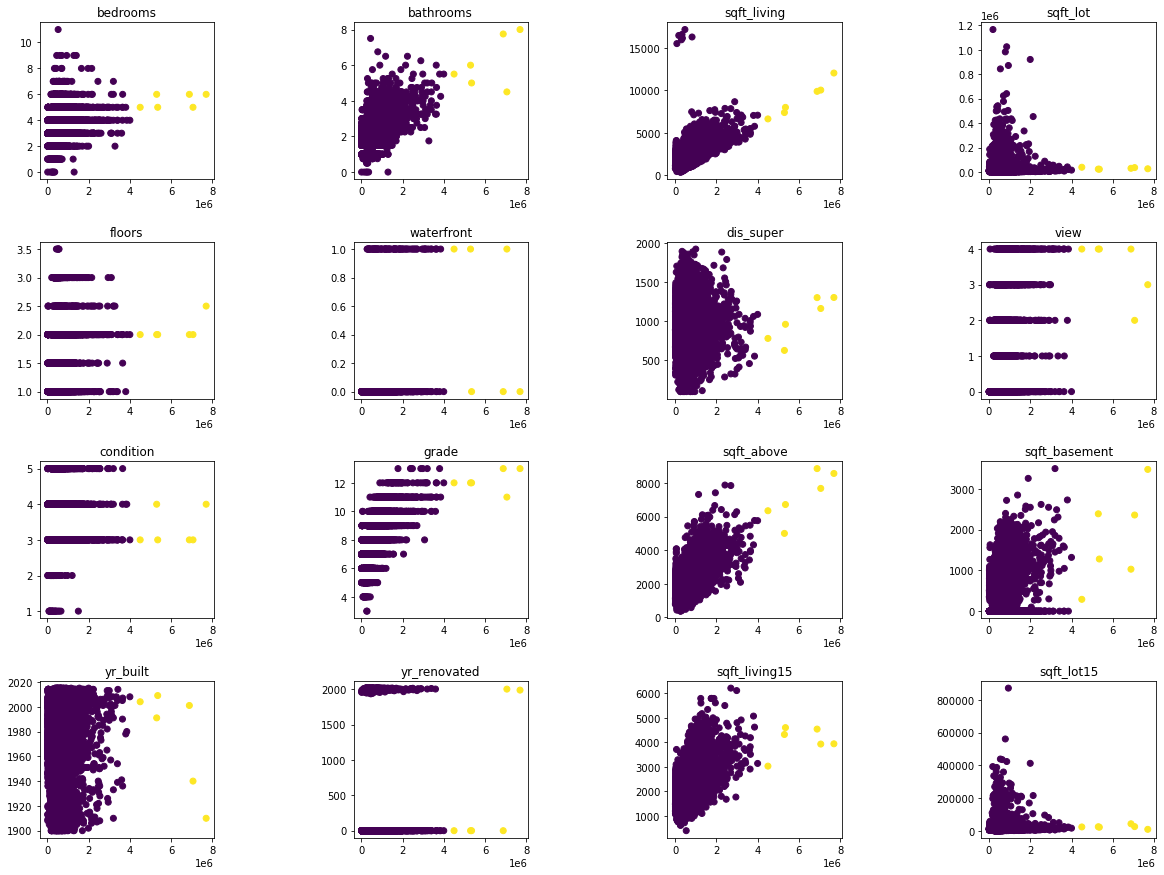

In [17]:
#Visuallisierung von Ausreißern
re_col=['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'dis_super', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15']
       

fig, ax = plt.subplots(4,4, figsize=(20,15))
fig.subplots_adjust(hspace = .4, wspace=0.8)
ax=ax.ravel()

df1 = df.dropna()

x=0
for i in re_col:
       z_score_mask = df1.assign(outlier = np.logical_or(df1["price"] > df1["price"].mean() + df1["price"].std() * 10, df1["price"] < df1["price"].mean() - df1["price"].std() * 10)).outlier
       ax[x].scatter(df1["price"],df1[i],c=z_score_mask)
       ax[x].set_title(i)
       x+=1

### Model testing (working title)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

def reg_train_test(X_train, X_test, y_train, y_test):
    '''Function for building Basic Regression Model'''

    # fit the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # evaluate the model
    ypred = model.predict(X_test)
    
    # evaluate predictions
    mae = mean_absolute_error(y_test, ypred)
    print(f'{bold("Mean Absolute Error")}: {blue(np.round(mae))}\n')
    
    print(f'{bold("Regression coefficients:")} \n{blue(model.coef_)}\n')
    
    print(bold("Prediction Examples:"))
    for i in range(0, 5):
        y_pre= ypred[i]
        print(f'{blue(i)} Actual y: {blue(y_test[i])} Predicted y: {blue(np.round(y_pre))}')
 
    return model

In [19]:
from sklearn.model_selection import train_test_split
from datetime import datetime

# Select price as label
df = df.dropna()
y =  df["price"]

# remove price_data from list
X = df.drop(columns=["price"])

# Transform Column to a numeric value
X.date = X.date.apply(lambda x: datetime.strptime(x, "%Y%m%dT000000").timestamp())

# Dataframes in numpy-Arrays konvertieren
X,y  = np.array(X.values.tolist()), np.array(y.values.tolist())

#split Data and train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
model_1 = reg_train_test(X_train, X_test, y_train, y_test)

Mean Absolute Error: 129029.0

Regression coefficients: 
[ 1.37712462e-03 -3.86984557e+04  4.92062712e+04 -6.78776199e-01
  7.35303324e-02 -5.23928591e+02  6.44972526e+05  3.06983950e+00
  4.76102883e+04  3.12763423e+04  9.15028606e+04  1.81337570e+02
  1.46040341e+02 -2.62590937e+03  2.58888872e+01 -3.82501551e+02
  6.64558284e+05 -1.47930773e+05  2.44677474e+01 -3.63273711e-01
 -8.59247878e+01  8.26026114e+01 -3.32217662e+00]

Prediction Examples:
0 Actual y: 863000.0 Predicted y: 910708.0
1 Actual y: 350000.0 Predicted y: 362408.0
2 Actual y: 563000.0 Predicted y: 628048.0
3 Actual y: 369990.0 Predicted y: 288979.0
4 Actual y: 195000.0 Predicted y: 155549.0


#### based on distances

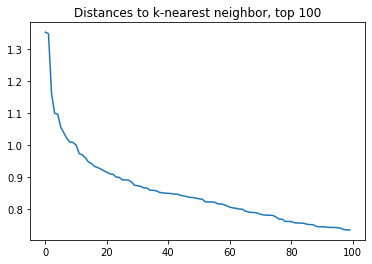

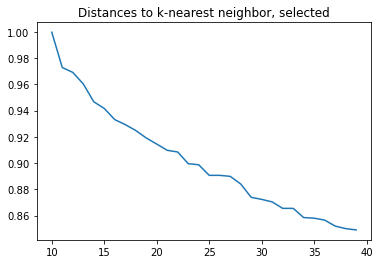

In [20]:
from sklearn.neighbors import NearestNeighbors
from sklearn import preprocessing

#normalize data to identify outliers
scaler = preprocessing.MinMaxScaler()
X= scaler.fit_transform(X_train)

#determine k nearest neighbors ()
k=3
nbrs = NearestNeighbors(n_neighbors=k+1, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)

#plot Distances to k-nearest neighbor, top 100
plt.title('Distances to k-nearest neighbor, top 100')
top_distance_min=0
top_distance_max=100
plt.plot(indices[top_distance_min:top_distance_max,0],-np.sort(-distances[:,k])[top_distance_min:top_distance_max])
plt.show()

#plot Distances to k-nearest neighbor, selected
plt.title('Distances to k-nearest neighbor, selected')
top_distance_min=10
top_distance_max=40
plt.plot(indices[top_distance_min:top_distance_max,0],-np.sort(-distances[:,k])[top_distance_min:top_distance_max])
plt.show()

In [21]:
#k= number of outliers // approx. 10% of data 
num_outliers= 181 
outlier_indices=np.argpartition(distances[:,1],-num_outliers)[-num_outliers:]
inlier_indices=np.delete(indices[:,0], outlier_indices)

#print("Indices of outliers: ",outlier_indices)
#print("Indices of inliers: ",inlier_indices)
#print("Distances of outliers: ",distances[outlier_indices,1])
#print("Max 10 distances: ",-np.sort(-distances[:,1])[0:10])

# select all rows that are not outliers (inlier=1, outlier=-1)
X_train_red, y_train_red = X_train[inlier_indices, :], y_train[inlier_indices]
# Inliers vs. Outliers
print(bold("Inliers: "),blue(X_train_red.shape[0]),bold("Outliers"),blue(X_train.shape[0]-X_train_red.shape[0]),"\n")
model_02 = reg_train_test(X_train_red ,X_test, y_train_red, y_test)

Inliers:  11471 Outliers 181 

Mean Absolute Error: 124799.0

Regression coefficients: 
[ 1.41510430e-03 -2.59369160e+04  4.18405769e+04 -8.04903522e+00
  2.54068694e-01  8.90144477e+03  4.07247314e+05 -3.93944108e-01
  4.72689845e+04  3.15434349e+04  9.65147123e+04  1.44455519e+02
  1.17104617e+02 -2.43827309e+03  2.49084310e+01 -3.37456670e+02
  6.49818544e+05 -1.34816676e+05  3.88681064e+01 -3.61310982e-01
 -5.59177531e+00 -8.35500990e+00 -1.39467851e+01]

Prediction Examples:
0 Actual y: 863000.0 Predicted y: 880205.0
1 Actual y: 350000.0 Predicted y: 364522.0
2 Actual y: 563000.0 Predicted y: 609283.0
3 Actual y: 369990.0 Predicted y: 300322.0
4 Actual y: 195000.0 Predicted y: 165398.0


#### based on density (clustering)

In [22]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=0.42, min_samples=5).fit(X)

inliers=[]
outliers=[]
index_upper=distances[:,1].size

for index in range (0,index_upper):
    if clustering.labels_[index] == -1:
        outliers.append([index, distances[index,1]])
    else:
        inliers.append([index, distances[index,1]])

inliers_df=pd.DataFrame(inliers,columns=['index','distance'])
outliers_df=pd.DataFrame(outliers,columns=['index','distance'])
# print("inliers: ",inliers_df.describe())
# print("\noutliers: ",outliers_df.describe())

In [23]:
# select all rows that are not outliers (inlier=1, outlier=-1)
X_train_red, y_train_red = X_train[inliers_df['index'], :], y_train[inliers_df['index']]

# Inliers vs. Outliers
print(bold("Inliers: "),blue(X_train_red.shape[0]),bold("Outliers"),blue(X_train.shape[0]-X_train_red.shape[0]))
model_03 = reg_train_test(X_train_red,X_test,y_train_red, y_test)

Inliers:  9964 Outliers 1688
Mean Absolute Error: 125945.0

Regression coefficients: 
[ 1.12198723e-03 -1.92963489e+04  3.52177987e+04  7.31665605e+01
  1.42838966e-01  1.28015084e+04 -4.36375558e-09  1.43573305e+00
  3.17769158e+04  2.74272372e+04  8.85255911e+04  5.21451163e+01
  2.10214442e+01 -2.19996261e+03  2.32537656e+01 -2.32708256e+02
  6.33014498e+05 -6.39002089e+04  2.54204871e+01 -4.13418432e-01
 -3.54418080e+01 -1.68816262e+00 -3.71299707e+01]

Prediction Examples:
0 Actual y: 863000.0 Predicted y: 844468.0
1 Actual y: 350000.0 Predicted y: 367072.0
2 Actual y: 563000.0 Predicted y: 596177.0
3 Actual y: 369990.0 Predicted y: 318117.0
4 Actual y: 195000.0 Predicted y: 195314.0


## Missing Values

In [24]:
print(f'Folgende {red(len(df[df.isnull().any(axis=1)]))} Zeilen haben ausgewiesene MV')
df[df.isnull().any(axis=1)]

Folgende 0 Zeilen haben ausgewiesene MV


Empty DataFrame
Columns: [date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, dis_super, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15, ahf1, ahf2, ahf3]
Index: []

[0 rows x 24 columns]

In [25]:
#Löschen aller Zeilen mit MV
df=df.dropna()

## Noise

## Transformation

### A) Datum

In [26]:
df["date"] = pd.to_datetime(df["date"])
df.head()

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0 2014-07-08   336000.0         4       2.50         2530      8169     2.0   
1 2014-05-27  1600000.0         3       3.25         3790     19000     2.0   
2 2015-04-17   460000.0         4       1.75         1870      8663     1.0   
3 2015-01-07   998500.0         3       1.75         2140      4800     2.0   
4 2014-07-14   745000.0         3       2.75         3010     12432     1.0   

   waterfront  dis_super  view  ...  yr_built  yr_renovated  zipcode      lat  \
0         0.0     562.16   0.0  ...    1993.0             0    98003  47.2634   
1         0.0    1462.74   4.0  ...    1985.0             0    98177  47.7240   
2         0.0     599.53   0.0  ...    1949.0             0    98133  47.7366   
3         0.0     970.84   0.0  ...    1905.0             0    98112  47.6311   
4         0.0    1157.55   0.0  ...    1970.0             0    98052  47.6392   

      long  sqft_living15  sqft_lot15       ahf1        ahf2        ahf3  
0 -122.312           2220        8013  24.658459  108.183999  132.842458  
1 -122.373           2740       18628  18.682061   83.213016  101.895077  
2 -122.350           1560        7800  75.078050  101.082827  176.160876  
3 -122.312           2440        4800  49.367640   97.749706  147.117347  
4 -122.108           2500       12432  43.343635   98.282451  141.626086  

[5 rows x 24 columns]

### B) Renovierung

In [27]:
renovated_yn= []
last_renovated=[]
df["year_sold"]=pd.DatetimeIndex(df['date']).year

for i in df.index:
    if df["yr_renovated"][i] != 0:
        renovated_yn.append(1)
        last_renovated.append(df["year_sold"][i]-df["yr_renovated"][i])
    else:
        renovated_yn.append(0)
        last_renovated.append(df["year_sold"][i]-df["yr_built"][i])

del df["year_sold"]
df["renovated_yn"] = renovated_yn
df["last_renovated"] = last_renovated
df.iloc[:,-2:]

renovated_yn  last_renovated
0                 0            21.0
1                 0            29.0
2                 0            66.0
3                 0           110.0
4                 0            44.0
...             ...             ...
14995             0           101.0
14996             0            20.0
14997             0            24.0
14998             0            11.0
14999             0            25.0

[14565 rows x 2 columns]

### C) Waterfront

In [28]:
df["waterfront"].value_counts()

0.0    14464
1.0      101
Name: waterfront, dtype: int64

### D) sqft_basement

In [29]:
df['sqft_basement'].describe()

count    14565.000000
mean       288.916650
std        441.085331
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       3500.000000
Name: sqft_basement, dtype: float64

### E) Data Type

### Normalisierung

### Standardisierung

## Korrelation

### A) Korrelationen zum Preis

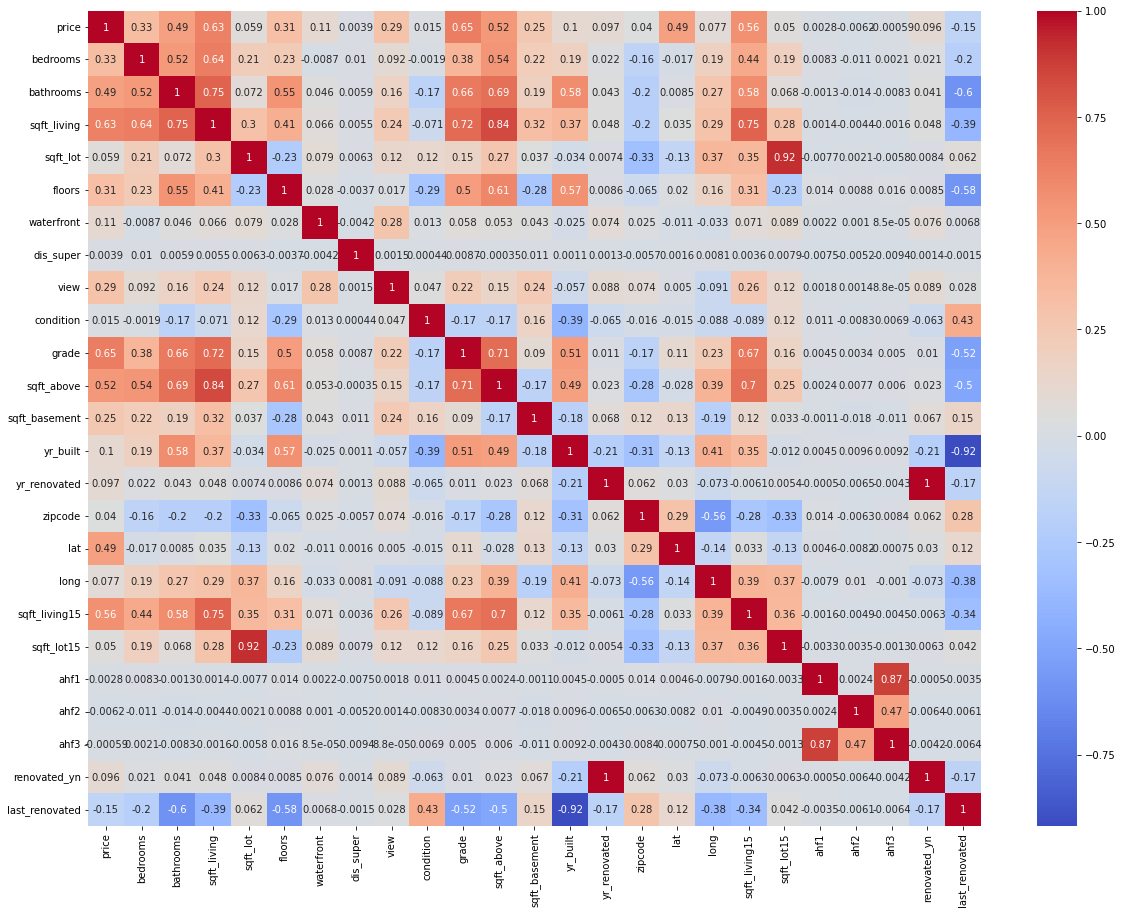

In [30]:
#data 
corr =df.corr(method="spearman")
#Größe der Heatmap
fig, ax = plt.subplots(figsize=(20,15))
#Colorpalette
cmap = sns.color_palette("coolwarm", as_cmap=True)
#Heatmap
sns.heatmap(ax=ax,data=corr,cmap=cmap, annot=True)
plt.show()

In [31]:
rel_features =[]
corr_fig = corr["price"]
ix = corr.sort_values('price', ascending=False).index
print("Relevante Korrelationen:")
for i in ix:
    if corr_fig[i]>= 0.3 or corr_fig[i]<=-0.3:
        rel_features.append(i)
        print("Die Korrelation von", i,"zum Preis:", corr_fig[i])

Relevante Korrelationen:
Die Korrelation von price zum Preis: 1.0
Die Korrelation von grade zum Preis: 0.6471802272822106
Die Korrelation von sqft_living zum Preis: 0.628917792434783
Die Korrelation von sqft_living15 zum Preis: 0.5637697633773658
Die Korrelation von sqft_above zum Preis: 0.5234665276302366
Die Korrelation von lat zum Preis: 0.4864288718768335
Die Korrelation von bathrooms zum Preis: 0.4850003518906319
Die Korrelation von bedrooms zum Preis: 0.3311092336905619
Die Korrelation von floors zum Preis: 0.3135045254066797


### B) Korrelationen zwischen den Features

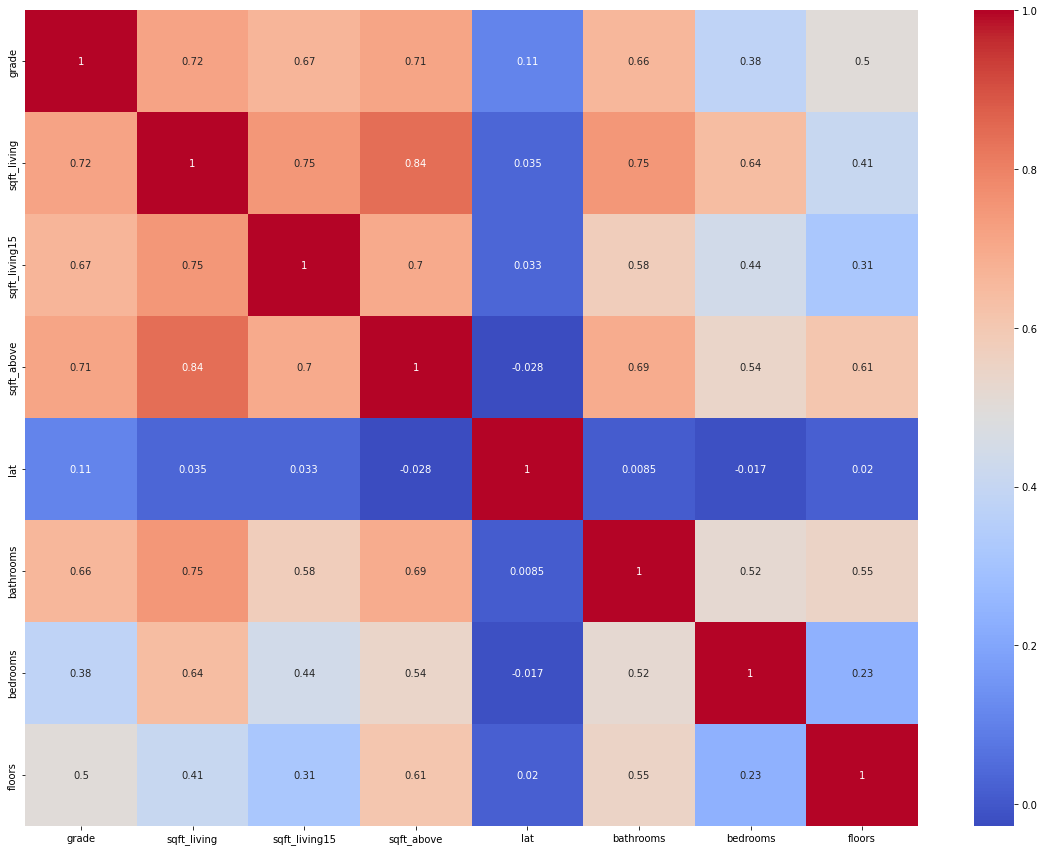

In [32]:
rel_features.remove("price")
corr_rel = corr.loc[rel_features,rel_features]
#Größe der Heatmap
fig, ax = plt.subplots(figsize=(20,15))
#Colorpalette
cmap = sns.color_palette("coolwarm", as_cmap=True)
#Heatmap
sns.heatmap(ax=ax,data=corr_rel,cmap=cmap, annot=True)
plt.show()

### C) PCA

In [35]:
x=df.loc[:,rel_features]

for num_components in range(1,5):
    pca = decomposition.PCA(n_components=num_components)
    pca.fit(x)
    cumulative_variance= round(pca.explained_variance_ratio_.sum(),2)
    variance_per_pc=pca.explained_variance_ratio_
    print('Number of components: ',num_components,' Variance % explained: ',cumulative_variance,variance_per_pc)

Number of components:  1  Variance % explained:  0.85 [0.84914772]
Number of components:  2  Variance % explained:  0.94 [0.84914772 0.08647679]
Number of components:  3  Variance % explained:  1.0 [0.84914772 0.08647679 0.06437476]
Number of components:  4  Variance % explained:  1.0 [8.49147717e-01 8.64767894e-02 6.43747625e-02 2.83233767e-07]


## Feature Selection